In [1]:
import re
import nltk
import string
import warnings

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

In [5]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
train[train['label']==0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
train[train['label']==1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [8]:
train.shape

(31962, 3)

In [11]:
test.shape

(17197, 2)

In [13]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [14]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

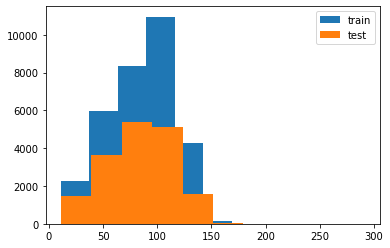

In [18]:
plt.hist(length_train,label='train')
plt.hist(length_test,label='test')
plt.legend()
plt.show()

In [19]:
#data cleaning

In [20]:
combi = train.append(test, ignore_index=True)
combi.shape

C:\Users\asus\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(49159, 3)

In [21]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt    

In [22]:
#remove twitter handle
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [23]:
#remove punctutaions, numbers,special chars
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [24]:
#remove short words
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [44]:
#text normalization
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [w, h, e, n, f, a, t, h, e, r, d, y, s, f, u, ...
1    [t, h, a, n, k, #, l, y, f, t, c, r, e, d, i, ...
2    [b, i, h, d, a, y, y, o, u, r, m, a, j, e, s, ...
3    [#, m, o, d, e, l, l, o, v, e, t, a, k, e, w, ...
4    [f, a, c, t, s, g, u, i, d, s, o, c, i, e, t, ...
Name: tidy_tweet, dtype: object

In [45]:
from nltk.stem.porter import*
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [ stemmer.stem(i) for i in x])

In [46]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

In [59]:
#understand common words used in tweets 
all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800,height=500,random_state=21).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [61]:
#words in non racist tweets
normal_words= ' '.join([text for text in combi['tidy_tweet'][combi['label']==0]]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800,height=500,random_state=21).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [63]:
#words in racist tweets
neg_words= ' '.join([text for text in combi['tidy_tweet'][combi['label']==1]]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800,height=500,random_state=21).generate(neg_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [64]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0]) 
# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 
# unnesting list HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

In [65]:
#non-racist

In [66]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag':list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags    
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count')
plt.show()

TypeError: unhashable type: 'list'

In [67]:
#racist

In [68]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20)  
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

ValueError: min() arg is an empty sequence

<Figure size 1152x360 with 0 Axes>

In [69]:
#bag of words
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer 
import gensim

ModuleNotFoundError: No module named 'gensim'

In [56]:
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [57]:
!pip install wordcloud